In [56]:
import theano
import pymc3 as pm
import numpy as np
import theano.tensor as tt
from matplotlib import pyplot as plt

print('Running on PyMC3 v{}'.format(pm.__version__))

from datetime import datetime
import pickle # python3
import os
now = datetime.now

t_start = now()
print('hello')
print(t_start)

import multiprocessing
ncores = multiprocessing.cpu_count()
print('numcores: {}'.format(ncores))
#%%

Running on PyMC3 v3.8
hello
2020-02-27 17:46:39.838957
numcores: 8


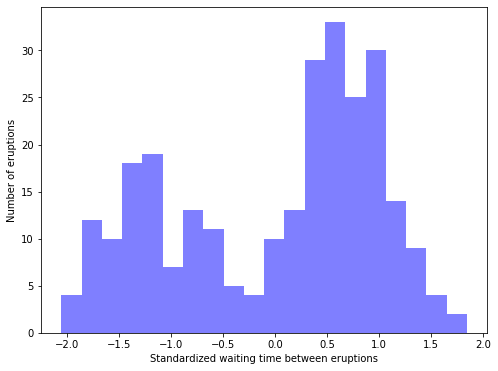

In [57]:
import pandas as pd
old_faithful_df = pd.read_csv(pm.get_data('old_faithful.csv'))
old_faithful_df['std_waiting'] = (old_faithful_df.waiting - old_faithful_df.waiting.mean()) / old_faithful_df.waiting.std()
old_faithful_df.head()

fig, ax = plt.subplots(figsize=(8, 6))

n_bins = 20
ax.hist(old_faithful_df.std_waiting, bins=n_bins, color='blue', lw=0, alpha=0.5);

ax.set_xlabel('Standardized waiting time between eruptions');
ax.set_ylabel('Number of eruptions');

In [218]:
N = old_faithful_df.shape[0]

K = 30

def stick_breaking(beta):
    portion_remaining = tt.concatenate([[1], tt.extra_ops.cumprod(1 - beta)[:-1]])
    return beta * portion_remaining

with pm.Model() as model:
    alpha = pm.Gamma('alpha', 1., 1.)
    beta = pm.Beta('beta', 1., alpha, shape=K)
    w = pm.Deterministic('w', stick_breaking(beta))

    tau = pm.Gamma('tau', 1., 1., shape=K)
    lambda_ = pm.Uniform('lambda', 0, 5, shape=K)
    mu = pm.Normal('mu', 0, tau=lambda_ * tau, shape=K)
    obs = pm.NormalMixture('obs', w, mu, tau=lambda_ * tau,
                           observed=old_faithful_df.std_waiting.values)

In [219]:
tt

<module 'theano.tensor' from '/Users/aidasaglinskas/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/__init__.py'>

In [196]:
w

array([7.67739954e-01, 1.85022165e-01, 3.33990611e-02, 9.07341984e-03,
       4.12934668e-03, 6.13855662e-04, 1.24495370e-05, 7.59548715e-06,
       1.96202696e-06, 1.90581475e-07])

(0, 1)

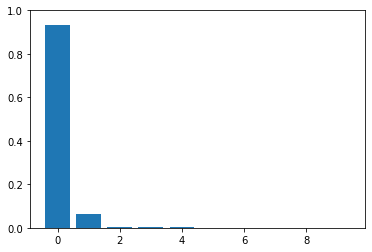

In [217]:
n=10
a=1
w = np.sort(Stick_Breaking(n,a))[::-1]


plt.bar(np.arange(n),w)
plt.ylim(0,1)

In [60]:
ndraws=15000
nproc=4
ntune=1000
trace = pm.sample(
    draws=ndraws,
    step=None,
    init='auto',
    n_init=200000,
    start=None,
    trace=None,
    chain_idx=0,
    chains=None,
    cores=nproc,
    tune=ntune,
    progressbar=True,
    model=model,
    random_seed=12345,
    discard_tuned_samples=True,
    compute_convergence_checks=True,
    target_accept=.95)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, lambda, tau, beta, alpha]
INFO:pymc3:NUTS: [mu, lambda, tau, beta, alpha]
Sampling 4 chains, 2,362 divergences: 100%|██████████| 28000/28000 [07:43<00:00, 60.44draws/s] 
There were 775 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 775 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8909545522036836, but should be close to 0.95. Try to increase the number of tuning steps.
There were 527 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 527 divergences after tuning. Increase `target_accept` or reparameterize.
There were 488 divergences afte

<MultiTrace: 4 chains, 6000 iterations, 10 variables>

In [61]:
pm.summary(trace,var_names=['w'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
w[0],0.500,0.148,0.300,0.691,0.054,0.042,8.0,7.0,10.0,362.0,1.33
w[1],0.421,0.156,0.179,0.709,0.041,0.037,15.0,9.0,18.0,94.0,1.39
w[2],0.066,0.145,0.000,0.399,0.013,0.009,120.0,120.0,170.0,160.0,1.04
w[3],0.008,0.023,0.000,0.034,0.001,0.000,1383.0,1383.0,283.0,323.0,1.00
w[4],0.003,0.009,0.000,0.012,0.000,0.000,1308.0,1308.0,248.0,269.0,1.01
w[5],0.001,0.005,0.000,0.004,0.000,0.000,1334.0,1334.0,241.0,303.0,1.01
w[6],0.001,0.002,0.000,0.002,0.000,0.000,1599.0,1599.0,224.0,310.0,1.01
w[7],0.000,0.001,0.000,0.001,0.000,0.000,2276.0,2276.0,206.0,307.0,1.01
w[8],0.000,0.001,0.000,0.000,0.000,0.000,2310.0,2310.0,204.0,349.0,1.00
w[9],0.000,0.000,0.000,0.000,0.000,0.000,2311.0,2311.0,198.0,358.0,1.00


In [62]:
pm.summary(trace,var_names=['mu'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu[0],-0.057,0.911,-1.264,0.757,0.387,0.290,6.0,6.0,9.0,100.0,1.44
mu[1],-0.438,0.901,-1.280,0.745,0.385,0.289,5.0,5.0,8.0,136.0,1.44
mu[2],-0.004,1.383,-2.021,1.933,0.072,0.056,369.0,302.0,491.0,618.0,1.01
mu[3],-0.027,2.115,-2.811,2.994,0.116,0.101,332.0,221.0,1186.0,523.0,1.00
mu[4],-0.000,1.885,-3.414,2.780,0.072,0.051,685.0,685.0,1056.0,648.0,1.01
mu[5],0.247,3.298,-3.497,3.790,0.229,0.168,207.0,194.0,731.0,483.0,1.01
mu[6],-0.132,3.120,-4.237,4.184,0.231,0.169,183.0,171.0,570.0,276.0,1.01
mu[7],0.040,2.423,-3.916,3.511,0.142,0.107,293.0,255.0,861.0,503.0,1.01
mu[8],0.131,2.419,-3.777,3.461,0.147,0.120,271.0,204.0,783.0,391.0,1.01
mu[9],-0.026,1.596,-2.960,2.752,0.054,0.047,862.0,583.0,1570.0,1065.0,1.00


In [63]:
#import warnings
#warnings.filterwarnings("ignore","Argument backend_kwargs has not effect in matplotlib.plot_dist")
#pm.sample_posterior_predictive(trace,100,model)

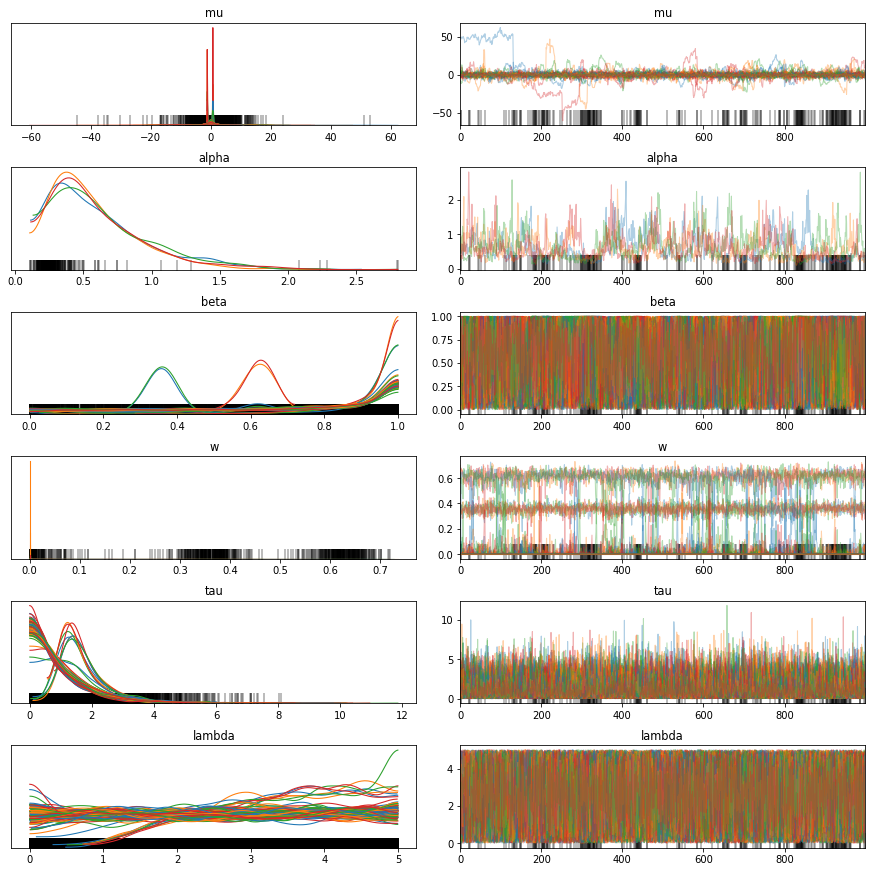

In [64]:
pm.traceplot(trace);

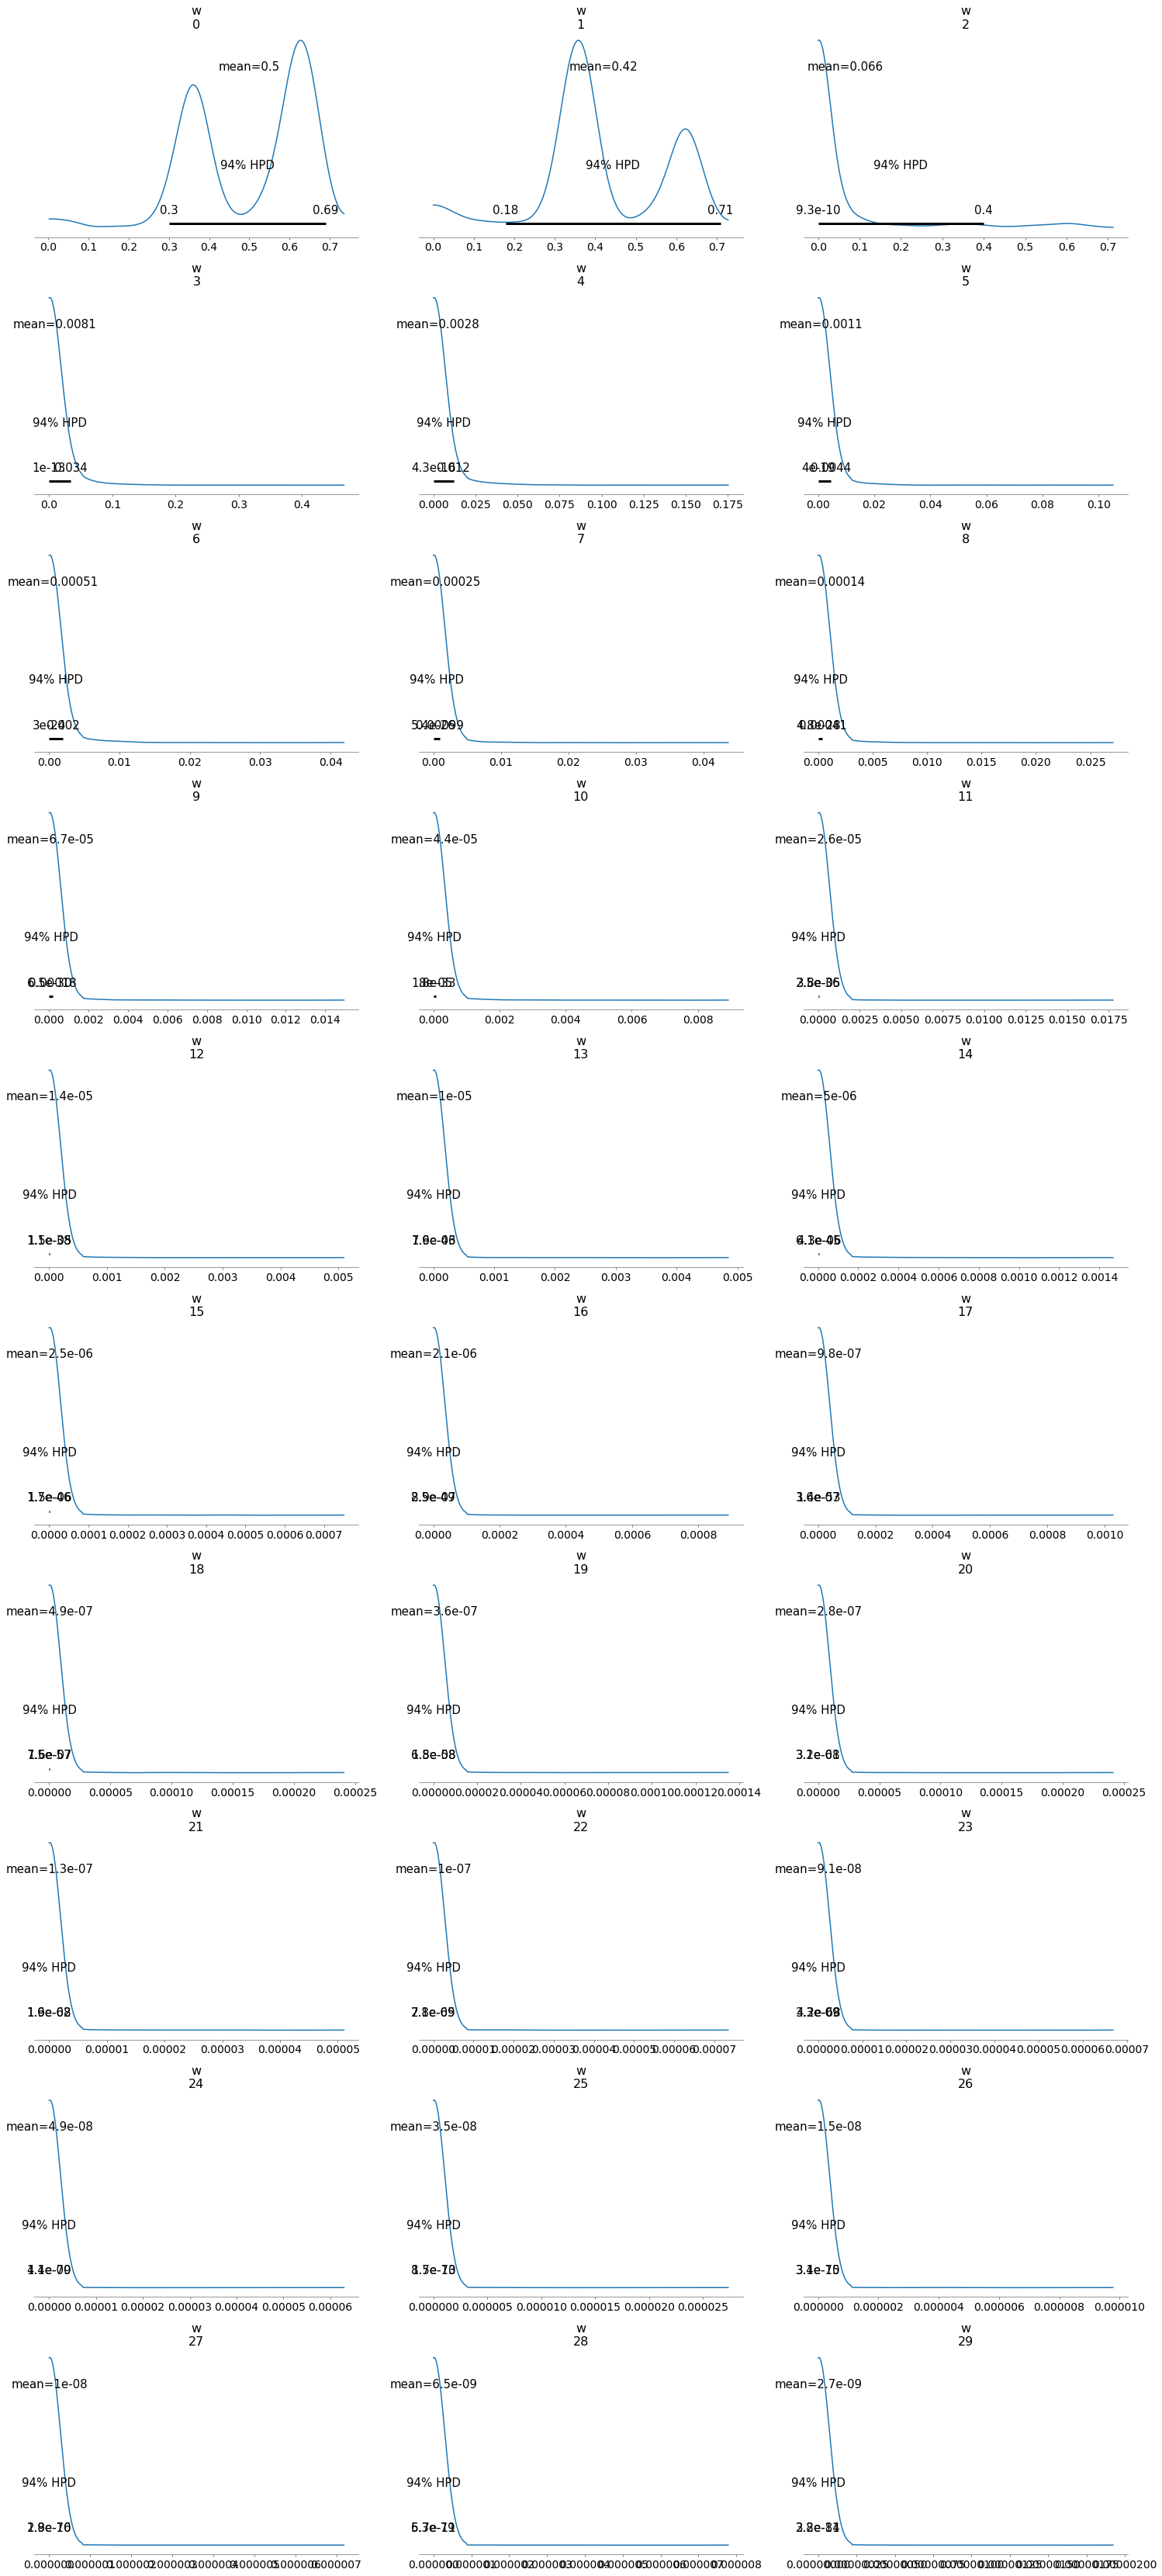

In [65]:
a = pm.plot_posterior(trace,var_names=['w']);

In [66]:
wp = pm.sample_prior_predictive(
    samples=500,
    model=model,
    var_names=['w'],)

<BarContainer object of 30 artists>

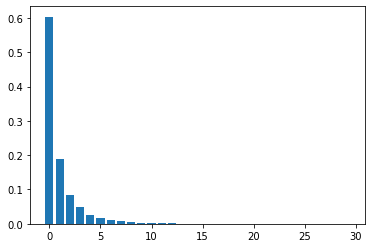

In [67]:
ys=wp['w'].mean(axis=0)
xs=np.arange(len(ys))
plt.bar(xs,ys)

In [68]:
wp = pm.sample_posterior_predictive(trace=trace,
    samples=500,
    model=model,
    var_names=['w'],)

/Users/aidasaglinskas/opt/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 500/500 [00:00<00:00, 2496.22it/s]


<BarContainer object of 30 artists>

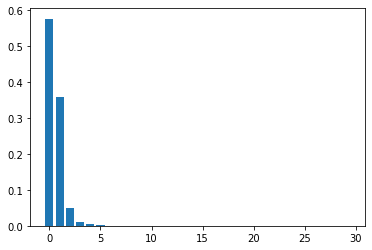

In [69]:
ys=wp['w'].mean(axis=0)
ys=np.sort(ys)[::-1]
xs=np.arange(len(ys))
plt.bar(xs,ys)